# Heart Disease Prediction

### Problem Summary

- We’re working with the Heart Disease dataset — a real-world medical dataset aimed at predicting whether a person has heart disease (target = 1) based on several health indicators.

- Goal: To predict if someone has heart disease using machine learning models: K-Means, KNN, Decision Tree, Neural Network.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

In [37]:
df = pd.read_csv("heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [38]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [39]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

| Feature    | Description                                          |
| ---------- | ---------------------------------------------------- |
| `age`      | Age of the patient                                   |
| `sex`      | Gender (1 = male, 0 = female)                        |
| `cp`       | Chest pain type                                      |
| `trestbps` | Resting blood pressure                               |
| `chol`     | Serum cholesterol                                    |
| `fbs`      | Fasting blood sugar (>120 mg/dl)                     |
| `restecg`  | Resting electrocardiographic results                 |
| `thalach`  | Maximum heart rate achieved                          |
| `exang`    | Exercise-induced angina                              |
| `oldpeak`  | ST depression induced by exercise                    |
| `slope`    | Slope of the peak exercise ST segment                |
| `ca`       | Number of major vessels (0–3) colored by fluoroscopy |
| `thal`     | Thalassemia                                          |


### Separating features from target

- X = All attributes (independent variables)

- y = target column (dependent variable – whether a patient has heart disease)

In [40]:
X = df.drop("condition", axis=1)
y = df["condition"]

### Splitting the dataset

We split the data into:

- 50% for training

- 50% for testing

- random_state=42 ensures reproducibility

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Standardizing Features

Some algorithms (like KNN and Neural Networks) are sensitive to feature scales. We standardize the data so that:

All features have mean 0 and std 1

No single feature dominates the others due to scale

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


- Goal: Cluster patients into 2 groups (with/without heart disease)

- This model doesn’t use the target (y) — it's unsupervised

- Just gives an exploratory sense of whether natural clusters exist in the data

In [43]:
# Store accuracy scores
accuracy_scores = {}

# KNN 

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        83
           1       0.75      0.86      0.80        66

    accuracy                           0.81       149
   macro avg       0.81      0.82      0.81       149
weighted avg       0.82      0.81      0.81       149



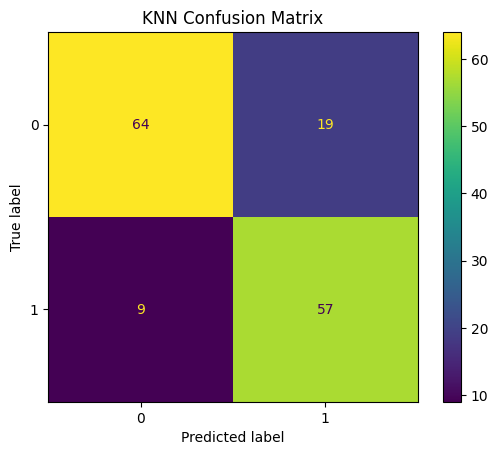

In [44]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)
print("KNN Classification Report:")
print(classification_report(y_test, knn_preds))
accuracy_scores['KNN'] = accuracy_score(y_test, knn_preds)

# Confusion matrix
cm_knn = confusion_matrix(y_test, knn_preds)
disp_knn = ConfusionMatrixDisplay(cm_knn)
disp_knn.plot()
plt.title("KNN Confusion Matrix")
plt.show()

# Decision Tree 

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        83
           1       0.73      0.83      0.78        66

    accuracy                           0.79       149
   macro avg       0.79      0.80      0.79       149
weighted avg       0.80      0.79      0.79       149



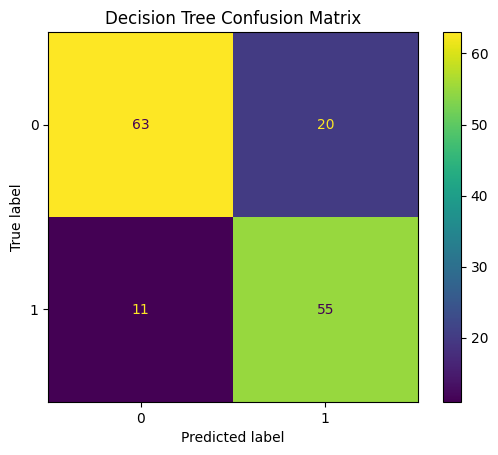

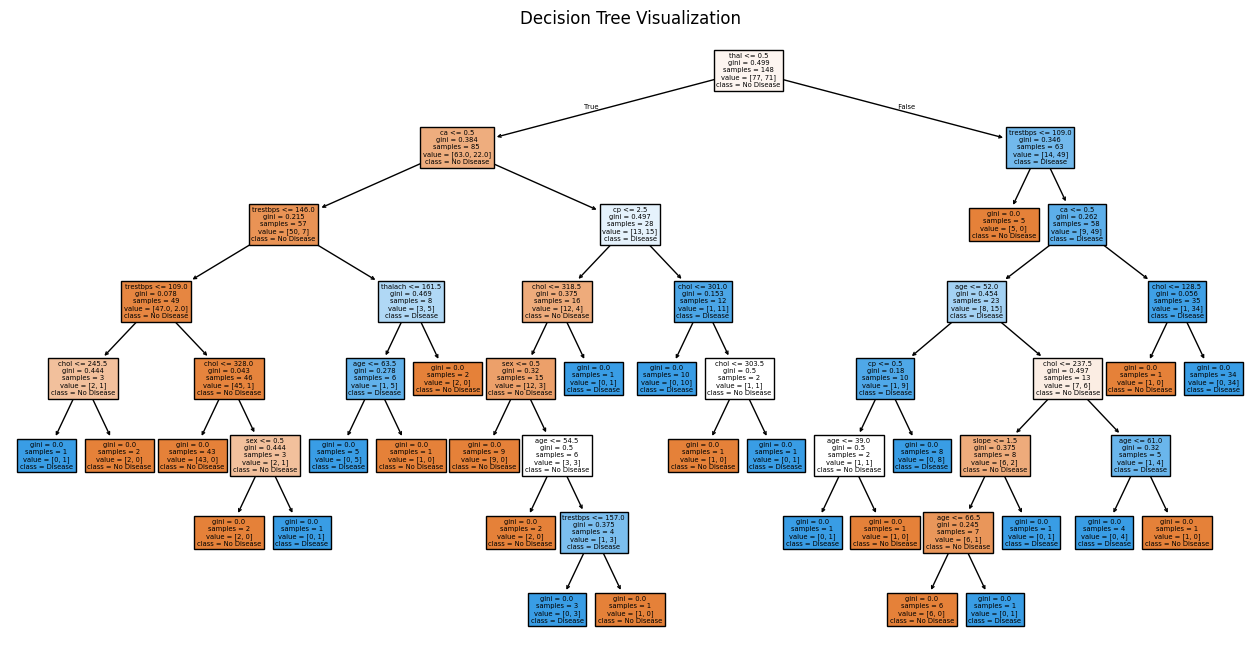

In [45]:

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree_preds = dtree.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dtree_preds))
accuracy_scores['Decision Tree'] = accuracy_score(y_test, dtree_preds)

# Confusion matrix
cm_dtree = confusion_matrix(y_test, dtree_preds)
disp_dtree = ConfusionMatrixDisplay(cm_dtree)
disp_dtree.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Visualize decision tree
plt.figure(figsize=(16, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Neural Network (MLPClassifier)

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        83
           1       0.74      0.83      0.79        66

    accuracy                           0.80       149
   macro avg       0.80      0.80      0.80       149
weighted avg       0.80      0.80      0.80       149



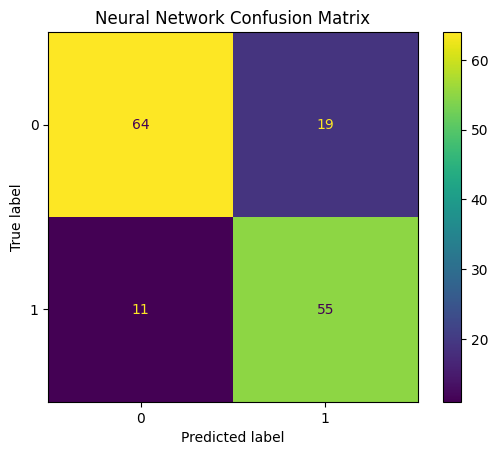

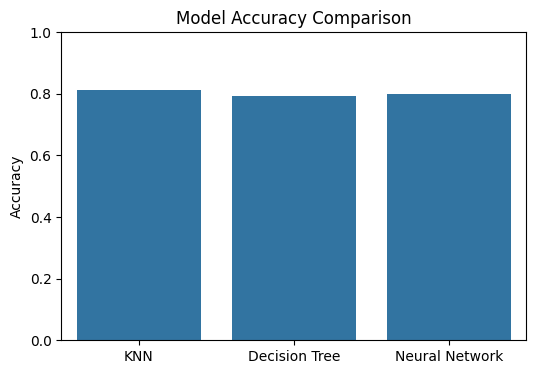

In [46]:

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_preds = mlp.predict(X_test_scaled)
print("Neural Network Classification Report:")
print(classification_report(y_test, mlp_preds))
accuracy_scores['Neural Network'] = accuracy_score(y_test, mlp_preds)

# Confusion matrix
cm_mlp = confusion_matrix(y_test, mlp_preds)
disp_mlp = ConfusionMatrixDisplay(cm_mlp)
disp_mlp.plot()
plt.title("Neural Network Confusion Matrix")
plt.show()

# Accuracy Comparison 
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
